Optimal value of depth 3


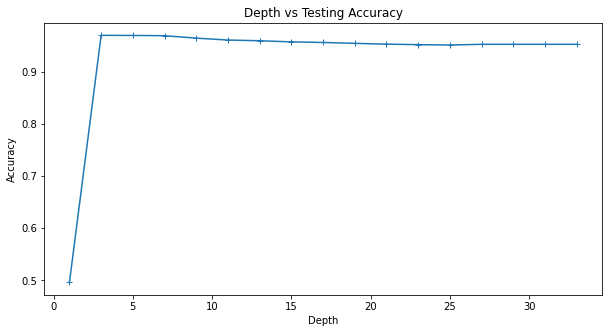

In [4]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 2.a
def Load_DataSet():
    
    # Dictionary of Columns 
    data2 = loadmat('/content/drive/My Drive/Projects/ML_Assignment/dataset_2.mat')
    data2_label = data2['labels'].reshape(20000,1)
    data2_image = data2['samples'].reshape(20000,2)

    df2_i = pd.DataFrame(data2_image,columns=['1','2'])
    df2_l = pd.DataFrame(data2_label,columns=['Label'])
    df2 = pd.concat([df2_i,df2_l],axis=1)
    
    return df2

Data = Load_DataSet()
#print(Data.head())
    
def Spilt_DataSet(Data,r): 
    Test_Data = Data.sample(n = int(r*len(Data)))
    Training_Data = pd.concat([Data,Test_Data])
    Training_Data = Training_Data.drop_duplicates(keep=False)
    
    return Training_Data , Test_Data

def accuracy(actual,predicted):
    c = 0
    for i in range(min(len(actual),len(predicted))):
        if(actual[i]!=predicted[i]):
            continue
        else:    
            c = c + 1
    return c/len(actual)
       
Train , Test = Spilt_DataSet(Data,0.3)
Test.Label = Test['Label'].astype(int)
Train.Label = Train['Label'].astype(int) 

def OptimalDepth(Train,Test,Hyper):
    scores = []
    for i in range(len(Hyper)):
        d_t = DecisionTreeClassifier(max_depth=Hyper[i],random_state=10)
        d_t.fit(Train[['1','2']],Train.Label)
        pred = d_t.predict(Test[['1','2']])
        scores.append(accuracy(list(pred),list(Test.Label)))
    print('Optimal value of depth',Depth[scores.index(max(scores))])

    plt.figure(figsize=(10,5))
    plt.title('Depth vs Testing Accuracy')
    plt.plot(Hyper,scores,marker='+')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.show()    
    
Depth = [ i  for i in range(1,35,2)]
OptimalDepth(Train,Test,Depth)  





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


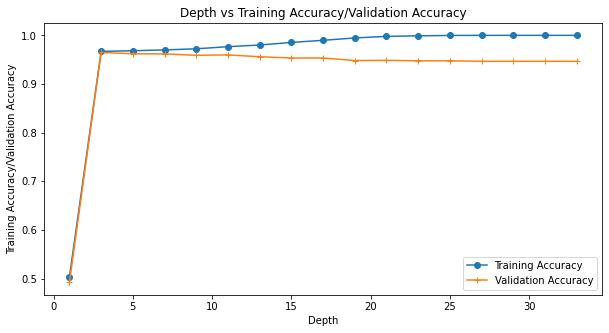

		Analysis Table 



,Depth,Training Accuracy,Validation Accuracy
0,1,0.503357,0.492000
1,3,0.967071,0.964833
2,5,0.968357,0.962167
3,7,0.970071,0.961833
4,9,0.972357,0.959000
5,11,0.976714,0.959833
6,13,0.980143,0.956000
7,15,0.985500,0.953500
8,17,0.989786,0.953500
9,19,0.994714,0.948167


In [ ]:
# 2.b

def TrainingVsValidation(Train,Test,Hyper):
    scores_train = []
    scores_val = []
    for i in range(len(Hyper)):
        d_t = DecisionTreeClassifier(max_depth=Hyper[i],random_state=10)
        d_t.fit(Train[['1','2']],Train.Label)
        pred_train = d_t.predict(Train[['1','2']]) 
        pred_val = d_t.predict(Test[['1','2']])
        scores_train.append(accuracy(list(pred_train),list(Train.Label)))
        scores_val.append(accuracy(list(pred_val),list(Test.Label)))
    plt.figure(figsize=(10,5))
    plt.title('Depth vs Training Accuracy/Validation Accuracy')
    plt.plot(Hyper,scores_train,label='Training Accuracy' , marker='o')
    plt.plot(Hyper,scores_val,label = 'Validation Accuracy',marker='+')
    plt.xlabel('Depth')
    plt.ylabel('Training Accuracy/Validation Accuracy')
    plt.legend()
    plt.show()

    Depth = [ i  for i in range(1,35,2)]
    print('\t\tAnalysis Table \n')
    D = pd.DataFrame()
    D['Depth']=Depth
    D['Training Accuracy']=scores_train
    D['Validation Accuracy']=scores_val
    return D
    
Depth = [ i  for i in range(1,35,2)]
D = TrainingVsValidation(Train,Test,Depth) 
D.head(len(D))


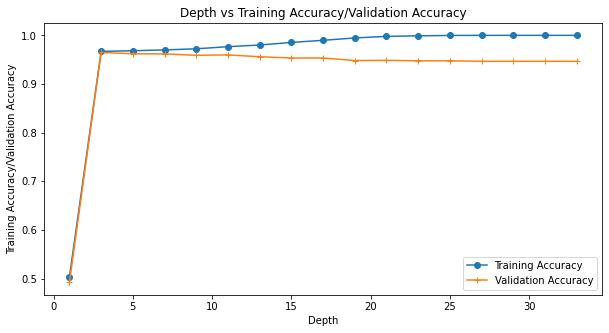

In [ ]:
# 2.c

def TrainVsValid(Train,Test,Hyper):
    scores_train = []
    scores_val = []
    for i in range(len(Hyper)):
        d_t = DecisionTreeClassifier(max_depth=Hyper[i],random_state=10)
        d_t.fit(Train[['1','2']],Train.Label)
        pred_train = d_t.predict(Train[['1','2']]) 
        pred_val = d_t.predict(Test[['1','2']])
        scores_train.append(accuracy_score(list(Train.Label),list(pred_train)))
        scores_val.append(accuracy_score(list(Test.Label),list(pred_val)))

    plt.figure(figsize=(10,5))
    plt.title('Depth vs Training Accuracy/Validation Accuracy')
    plt.plot(Depth,scores_train,marker='o',label='Training Accuracy')
    plt.plot(Depth,scores_val,marker='+',label='Validation Accuracy')
    plt.xlabel('Depth')
    plt.ylabel('Training Accuracy/Validation Accuracy')
    plt.legend()
    plt.show()
    
Depth = [ i  for i in range(1,35,2)]
TrainVsValid(Train,Test,Depth) 

